In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('customer_shopping_data.csv')

In [109]:
df.head() 

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [111]:
df.describe()


,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [112]:
df.isnull().sum()


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

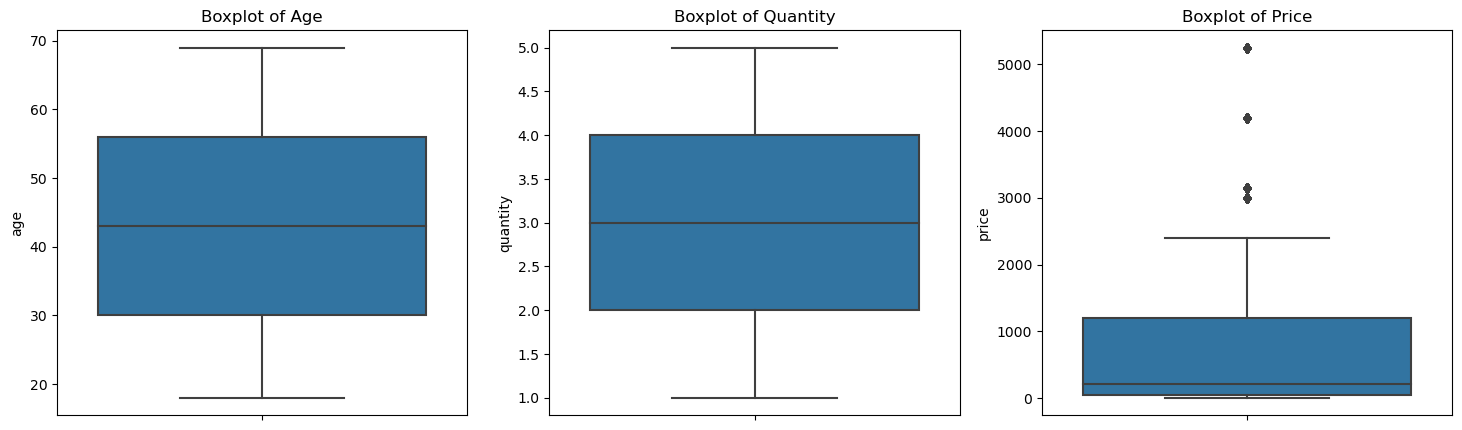

In [126]:

numerical_columns = ['age', 'quantity', 'price']
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='age')
plt.title('Boxplot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='quantity')
plt.title('Boxplot of Quantity')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='price')
plt.title('Boxplot of Price')
plt.show()


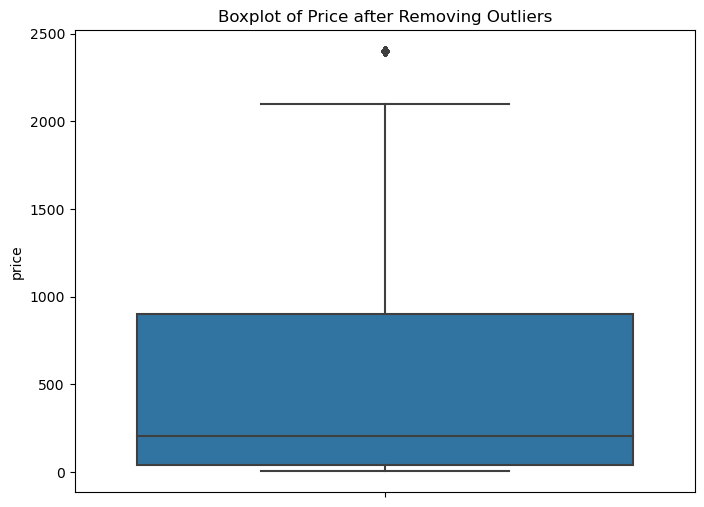

,age,quantity,price
count,94433.000000,94433.000000,94433.000000
mean,43.430813,2.929177,528.129519
std,14.996378,1.399855,614.205417
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,900.240000
max,69.000000,5.000000,2400.680000


In [123]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier = (df['price'] < lower_bound) | (df['price'] > upper_bound)
clean_df = df[~outlier].copy()

plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_df, y='price')
plt.title('Boxplot of Price after Removing Outliers')
plt.show()
clean_df.describe()

In [69]:
from sklearn.preprocessing import StandardScaler

features = clean_df[['age', 'quantity', 'price']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features_df.head()


,age,quantity,price
0,-1.028975,1.479320,1.582981
1,-1.495757,0.050593,2.071599
2,-1.562440,-1.378134,-0.371294
3,0.638103,0.764957,-0.761198
4,-1.028975,1.479320,1.582981


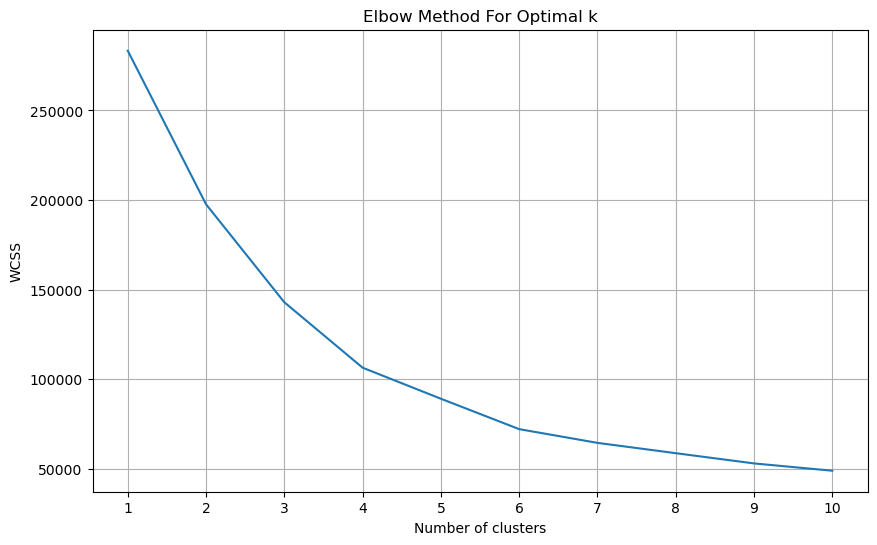

In [62]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [90]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(scaled_features_df)
clean_df['Cluster'] = kmeans.labels_
clean_df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Cluster,Scaled Age,Scaled Price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,0,-1.028975,1.582981
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,0,-1.495757,2.071599
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,2,-1.562440,-0.371294
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1,-1.028975,1.582981
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul,0,0.371371,-0.793663


In [91]:
cluster_centers = kmeans.cluster_centers_
original_cluster_centers = scaler.inverse_transform(cluster_centers)
centers_df = pd.DataFrame(original_cluster_centers, columns=['Age', 'Quantity', 'Price'])
centers_df

,Age,Quantity,Price
0,43.508810,3.978930,1470.935032
1,43.376169,4.332873,102.812432
2,29.516327,1.845834,310.301852
3,57.484728,1.849926,310.284804


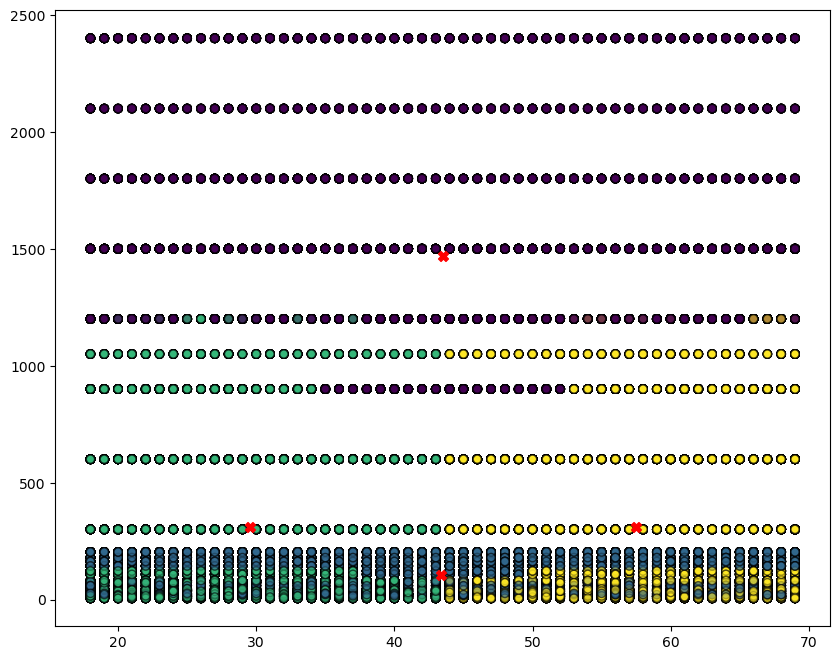

In [92]:
plt.figure(figsize=(10, 8))
plt.scatter(clean_df['age'], clean_df['price'], c=clean_df['Cluster'], cmap='viridis', marker='o', alpha=0.6, edgecolor='k', label='Data Points')
plt.scatter(original_cluster_centers[:, 0], original_cluster_centers[:, 2], s=50, c='red', label='Centroids', marker='X')
plt.show()


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

X_train, X_test = train_test_split(scaled_features_df, test_size=0.3, random_state=42)
kmeans_train = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_train.fit(X_train)

silhouette_score_train = silhouette_score(X_train, kmeans_train.labels_)
test_labels = kmeans_train.predict(X_test)
silhouette_score_test = silhouette_score(X_test, test_labels)
(silhouette_score_train, silhouette_score_test)

(0.3458718753433453, 0.34605059881570577)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = clean_df[['age']]
y = clean_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
(mse)
mae = mean_absolute_error(y_test, y_pred)
(mae)

Mean Squared Error: 379427.898279817
Mean Absolute Error: 517.3592963320682


Text(0, 0.5, 'Predicted Prices')

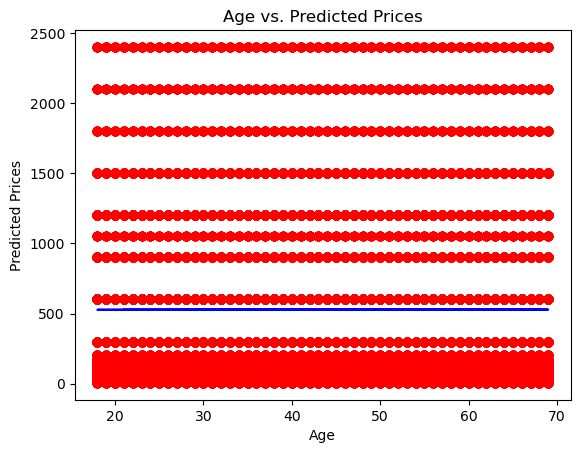

In [45]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, linear_reg.predict(X_train), color = 'blue')
plt.title('Age vs. Predicted Prices')
plt.xlabel('Age')
plt.ylabel('Predicted Prices')

In [115]:
clean_df['gender'] = clean_df['gender'].map({'Female': 0, 'Male': 1})
features = cleaned_df[['age', 'quantity', 'price', 'gender']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features_df.head()


,age,quantity,price,gender
0,-1.028975,1.479320,1.582981,-0.819216
1,-1.495757,0.050593,2.071599,1.220680
2,-1.562440,-1.378134,-0.371294,1.220680
3,0.638103,0.764957,-0.761198,-0.819216
4,-1.028975,1.479320,1.582981,-0.819216


In [120]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(scaled_features_df)
cleaned_df['cluster'] = kmeans.labels_
cleaned_df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,cluster
0,I138884,C241288,0,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,0
1,I317333,C111565,1,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,0
2,I127801,C266599,1,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,1
4,I337046,C189076,0,53,Books,4,60.60,Cash,24/10/2021,Kanyon,3
5,I227836,C657758,0,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul,0


In [121]:
cluster_centers = kmeans.cluster_centers_
original_cluster_centers = scaler.inverse_transform(cluster_centers)
centers_df = pd.DataFrame(original_cluster_centers, columns=['Age', 'Quantity', 'Price','Gender',])
centers_df

,Age,Quantity,Price,Gender
0,43.609276,4.156375,1553.404540,4.038000e-01
1,43.351835,2.622406,273.006833,1.000000e+00
2,30.549312,2.680827,275.642539,2.076117e-14
3,56.459163,2.573231,274.828956,2.070566e-14


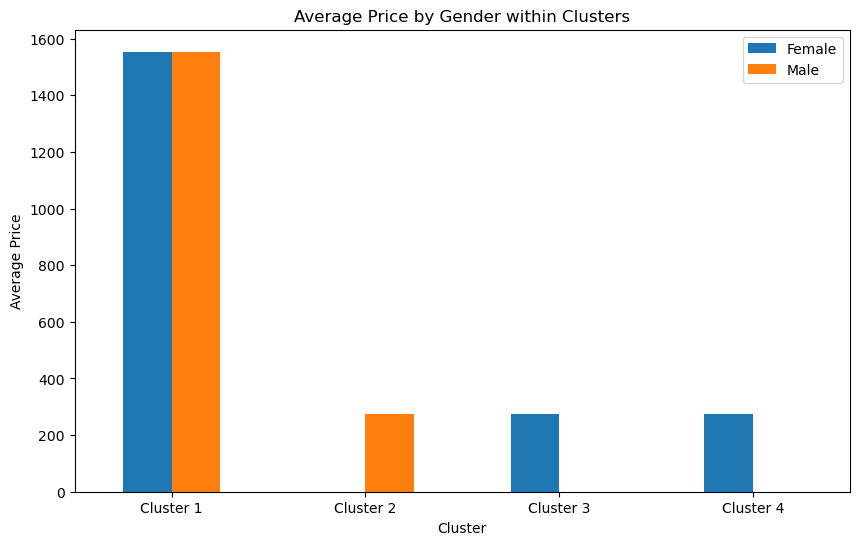

In [117]:
cluster_gender_price = clean_df.groupby(['cluster', 'gender'])['price'].mean().unstack()
cluster_gender_price.plot(kind='bar', figsize=(10, 6))
plt.title('Average Price by Gender within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Price')
plt.xticks(ticks=range(len(cluster_gender_price)), labels=['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4'], rotation=0)
plt.legend(['Female', 'Male'])
plt.show()